In [11]:
from google.colab import drive

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd drive/MyDrive/Assignments

[Errno 2] No such file or directory: 'drive/MyDrive/Assignments'
/content/drive/MyDrive/Assignments


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [26]:
data=pd.read_csv('Elon_musk.csv',encoding='latin1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [27]:
data.shape

(1999, 2)

In [38]:
#creating function to clean text

def clean_txt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)          #removes @mention
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\S]+','',text)
  text=re.sub(r'https?:\/\/\S+','',text)
  return text

#cleaning text
data['Text']=data['Text'].apply(clean_txt)

#printing cleaned text
data


,Unnamed: 0,Text,Subjectivity,Polarity,Analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [39]:
#Subjectivity - talks about as how text is subjective or how opinion oriented it is
#Polairy -  talks as how positive or negative text is

# creating function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creating function to get polarity
def getpolrity(text):
  return TextBlob(text).sentiment.polarity

# Creating new columns of polarity and subjectivity in data
data['Subjectivity']=data['Text'].apply(getSubjectivity)
data['Polarity']=data['Text'].apply(getpolrity)

In [40]:
data.sample(10)

,Unnamed: 0,Text,Subjectivity,Polarity,Analysis
1468,1469,A metaphor for life,0.000000,0.0,Neutral
1175,1176,"Mostly 304L, some 301. Broke at 301 to 304...",0.500000,0.5,Positive
12,13,,0.000000,0.0,Neutral
114,115,"_Cooney He became a big fan of methane, b...",0.100000,0.0,Neutral
1247,1248,_AA_Carmack Dojo uses our own chips &amp; a c...,0.500000,0.3,Positive
489,490,I still have a soft spot in my heart for tr...,0.350000,0.1,Positive
1448,1449,_feed Astronaughty,0.000000,0.0,Neutral
1142,1143,Weld esthetics will improve greatly in upcomi...,0.750000,0.8,Positive
503,504,<U+0001F920>,0.000000,0.0,Neutral
973,974,For sure,0.888889,0.5,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

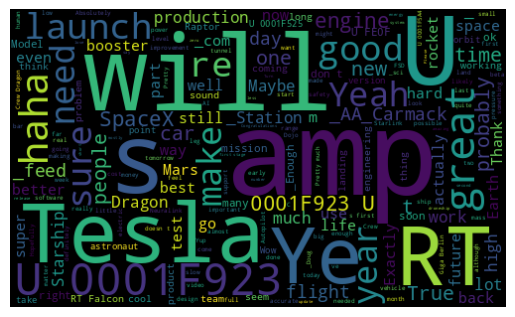

In [41]:
# Will now analyze how well the sentiments are distributed that is done by finding out the common words. This is done
# applying Word cloud which is visulization method
#Plotting sentiment with Wordcloud
allwords=' '.join([text for text in data['Text']])
wordcloud=WordCloud(width=500,height=300,random_state=40,max_font_size=120).generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show

In [42]:
# Anlayising the polarity column of data by naming emtion as +ve,-ve or neutral
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis']=data['Polarity'].apply(getAnalysis)

data.sample(10)

,Unnamed: 0,Text,Subjectivity,Polarity,Analysis
303,304,_feed His sick beats,0.857143,-0.714286,Negative
547,548,Just a static fire tomorrow. Flight no earli...,0.700000,0.250000,Positive
136,137,"With Cyberpunk, even the hotfixes literally ha...",0.575000,0.200000,Positive
288,289,<U+0001F622>,0.000000,0.000000,Neutral
1728,1729,I I just died in your arms tonight,0.000000,0.000000,Neutral
278,279,The factory is the product,0.000000,0.000000,Neutral
599,600,Quite the day ahead,0.000000,0.000000,Neutral
407,408,_extrachars You can upload custom music/sounds,0.000000,0.000000,Neutral
1448,1449,_feed Astronaughty,0.000000,0.000000,Neutral
1666,1667,"RT : ""To anybody who has touched Endeavour, yo...",0.500000,0.500000,Positive


<ipython-input-49-82a0006990b4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


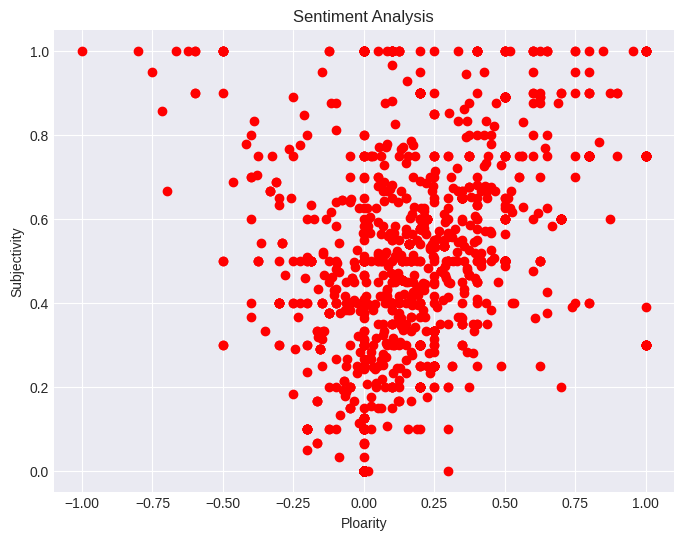

In [49]:
#Plotting Subjectivity and Polariyity
plt.figure(figsize=(8,6))
plt.style.use('seaborn-darkgrid')
for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Ploarity')
plt.ylabel('Subjectivity')
plt.show()

In [50]:
#getting percentage of postive tweets
ptweets=data[data.Analysis=='Positive']
ptweets=ptweets['Text']
round((ptweets.shape[0]/data.shape[0]*100),1)

44.2

In [52]:
ntweets=data[data.Analysis=='Negative']
ntweets=ntweets['Text']
round((ntweets.shape[0]/data.shape[0]*100),1)

11.0

In [53]:
neutraltweets=data[data.Analysis=='Neutral']
neutraltweets=neutraltweets['Text']
round((neutraltweets.shape[0]/data.shape[0]*100),1)

44.8

In [54]:
#value counts
data['Analysis'].value_counts()

Neutral     896
Positive    884
Negative    219
Name: Analysis, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

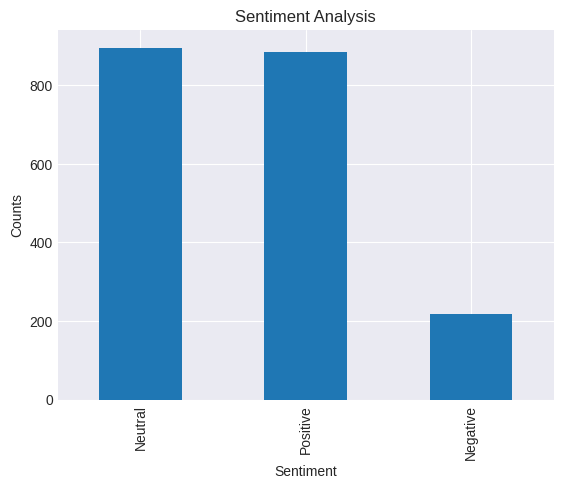

In [55]:
#Plotting the analysis
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show